In [1]:
from fields import Fields
import numpy as np
import matplotlib.pyplot as plt
from fisher import Fisher
from scipy.interpolate import InterpolatedUnivariateSpline
from cosmology import Cosmology
import postborn
from scipy import stats

In [2]:
fish = Fisher()

In [3]:
omega_Ls_mine = np.load("cache/_C_omega/Ls.npy")
omega_mine = np.load("cache/_C_omega/C_omega.npy")
omega_spline_mine = InterpolatedUnivariateSpline(omega_Ls_mine, omega_mine)

In [4]:
def _C_inv_splines(fields, L_max_map=5000, L_min_cut=30, L_max_cut=3000):
    C_inv = fish.covariance.get_C_inv(fields, L_max_map, 353e9)
    N_fields = np.size(list(fields))
    C_inv_splines = np.empty((N_fields, N_fields), dtype=InterpolatedUnivariateSpline)
    Ls = np.arange(L_max_map+1)
    for iii in range(N_fields):
        for jjj in range(N_fields):
            C_inv_ij = C_inv[iii, jjj]
            C_inv_ij[L_max_cut+1:] = 0
            C_inv_ij[:L_min_cut] = 0
            C_inv_splines[iii, jjj] = InterpolatedUnivariateSpline(Ls, C_inv_ij)
    return C_inv_splines

In [15]:
Ls = np.load("_results/F_L_results/kgI/SO/gmv/TEB/30_3000/1_2000/Ls.npy")
F_L_spline_kgI = InterpolatedUnivariateSpline(Ls, np.load("_results/F_L_results/kgI/SO/gmv/TEB/30_3000/1_2000/F_L.npy"))
%time C_inv_spline_kgI = _C_inv_splines("kgI")

CPU times: user 54.5 s, sys: 2.69 s, total: 57.2 s
Wall time: 8.16 s


[0:00:54] 100%
[0:00:54] 100%
[0:00:55] 100%
[0:00:55] 100%
[0:00:54] 100%


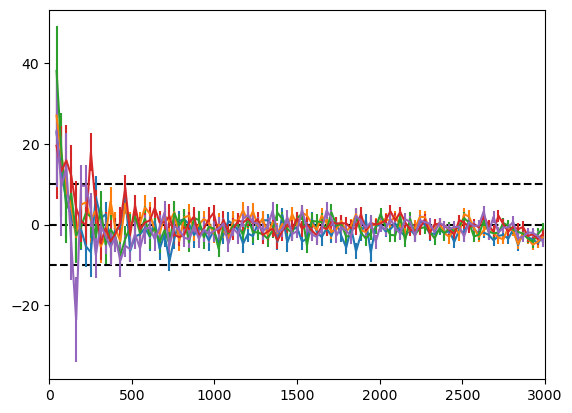

In [16]:
# Nchi 100
plt.plot([0,3000],[0,0], linestyle="--", color="k")
plt.plot([0,3000],[10,10], linestyle="--", color="k")
plt.plot([0,3000],[-10,-10], linestyle="--", color="k")


for iii in range(5):
    N_pix_pow = 10
    fields = Fields("kgI", N_pix_pow=N_pix_pow)
    omega_10_kgI = fields.get_omega_template(100, F_L_spline=F_L_spline_kgI, C_inv_spline=C_inv_spline_kgI, tracer_noise=True)
    Lmap_10_kgI = fields.kM
    ps_10_kgI, kBins, errs_10_kgI = fields.get_ps_binned(omega_10_kgI, nBins=100, kmin=30, kmax=3000, kM=Lmap_10_kgI)
    fiducial = (2 * np.pi) ** 2 *omega_spline_mine(kBins)/F_L_spline_kgI(kBins)
    plt.errorbar(kBins, (fiducial - ps_10_kgI)/fiducial * 100, errs_10_kgI/fiducial * 100, label="10")


# plt.ylim(-4,4)
plt.xlim(0,3000)
plt.show()

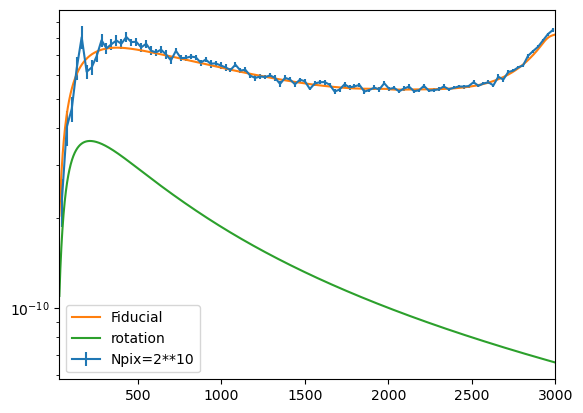

In [17]:
ps_10_kgI, kBins, errs_10_kgI = fields.get_ps_binned(omega_10_kgI, nBins=100, kmin=30, kmax=3000)

plt.errorbar(kBins, ps_10_kgI, errs_10_kgI, label=f"Npix=2**10")

Ls = np.arange(30, 3000)
plt.semilogy(Ls, (2 * np.pi) ** 2 * omega_spline_mine(Ls)/F_L_spline_kgI(Ls), label="Fiducial")
plt.semilogy(Ls, (2 * np.pi) ** 2 * omega_spline_mine(Ls), label="rotation")
plt.xlim(30,3000)
plt.legend()

[0:09:16] 100%


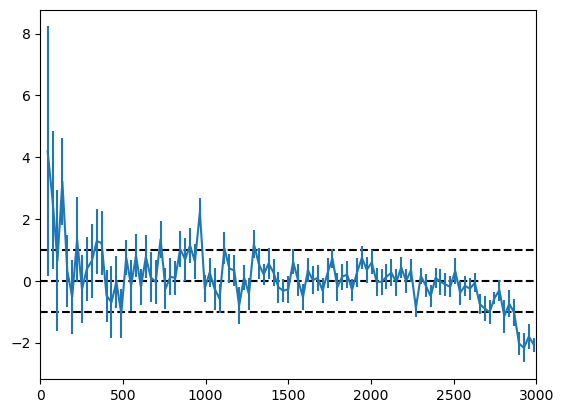

In [19]:
# Nchi 100
plt.plot([0,3000],[0,0], linestyle="--", color="k")
plt.plot([0,3000],[1,1], linestyle="--", color="k")
plt.plot([0,3000],[-1,-1], linestyle="--", color="k")


N_pix_pow = 12
fields = Fields("kgI", N_pix_pow=N_pix_pow)
omega_12_kgI = fields.get_omega_template(100, F_L_spline=F_L_spline_kgI, C_inv_spline=C_inv_spline_kgI, tracer_noise=True)
ps_12_kgI, kBins, errs_12_kgI = fields.get_ps_binned(omega_12_kgI, nBins=100, kmin=30, kmax=3000)
fiducial = (2 * np.pi) ** 2 *omega_spline_mine(kBins)/F_L_spline_kgI(kBins)
plt.errorbar(kBins, (fiducial - ps_12_kgI)/fiducial * 100, errs_12_kgI/fiducial * 100, label="12")


# plt.ylim(-4,4)
plt.xlim(0,3000)
plt.show()

In [13]:
Ls = np.load("_results/F_L_results/k/SO/gmv/TEB/30_3000/1_2000/Ls.npy")
F_L_spline_k = InterpolatedUnivariateSpline(Ls, np.load("_results/F_L_results/k/SO/gmv/TEB/30_3000/1_2000/F_L.npy"))
%time C_inv_spline_k = _C_inv_splines("k")

CPU times: user 24.4 s, sys: 999 ms, total: 25.4 s
Wall time: 3.18 s


[0:00:35] 100%
[0:00:34] 100%
[0:00:36] 100%
[0:00:35] 100%
[0:00:35] 100%


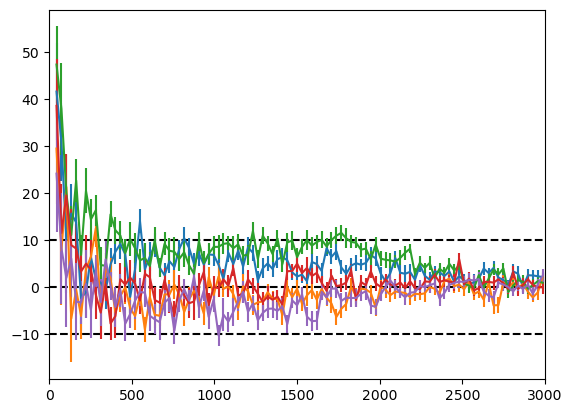

In [14]:
# Nchi 100
plt.plot([0,3000],[0,0], linestyle="--", color="k")
plt.plot([0,3000],[10,10], linestyle="--", color="k")
plt.plot([0,3000],[-10,-10], linestyle="--", color="k")

fiducial = (2 * np.pi) ** 2 *omega_spline_mine(kBins)/F_L_spline_k(kBins)

for iii in range(5):
    N_pix_pow = 10
    fields = Fields("k", N_pix_pow=N_pix_pow)
    omega_10_k= fields.get_omega_template(100, F_L_spline=F_L_spline_k, C_inv_spline=C_inv_spline_k, tracer_noise=True)
    Lmap_10_k = fields.kM
    ps_10_k, kBins, errs_10_k = fields.get_ps_binned(omega_10_k, nBins=100, kmin=30, kmax=3000, kM=Lmap_10_k)
    plt.errorbar(kBins, (fiducial - ps_10_k)/fiducial * 100, errs_10_k/fiducial * 100, label="10")


# plt.ylim(-4,4)
plt.xlim(0,3000)
plt.show()

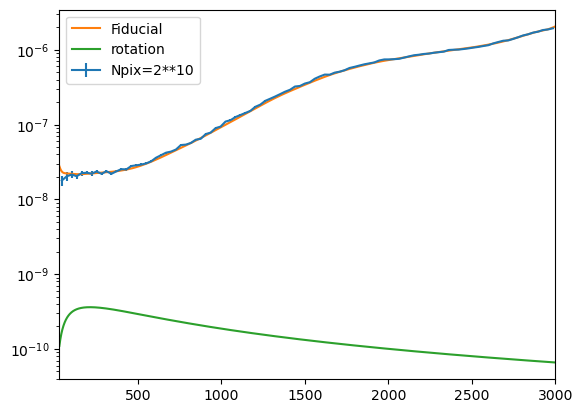

In [15]:
ps_10_k, kBins, errs_10_k = fields.get_ps_binned(omega_10_k, nBins=100, kmin=30, kmax=3000)

plt.errorbar(kBins, ps_10_k, errs_10_k, label=f"Npix=2**10")

Ls = np.arange(30, 3000)
plt.semilogy(Ls, (2 * np.pi) ** 2 * omega_spline_mine(Ls)/F_L_spline_k(Ls), label="Fiducial")
plt.semilogy(Ls, (2 * np.pi) ** 2 * omega_spline_mine(Ls), label="rotation")
plt.xlim(30,3000)
plt.legend()

In [10]:
Ls = np.load("_results/F_L_results/g/SO/gmv/TEB/30_3000/1_2000/Ls.npy")
F_L_spline_g = InterpolatedUnivariateSpline(Ls, np.load("_results/F_L_results/g/SO/gmv/TEB/30_3000/1_2000/F_L.npy"))
%time C_inv_spline_g = _C_inv_splines("g")

CPU times: user 323 ms, sys: 185 ms, total: 508 ms
Wall time: 134 ms


[0:00:32] 100%
[0:00:32] 100%
[0:00:31] 100%
[0:00:33] 100%
[0:00:32] 100%


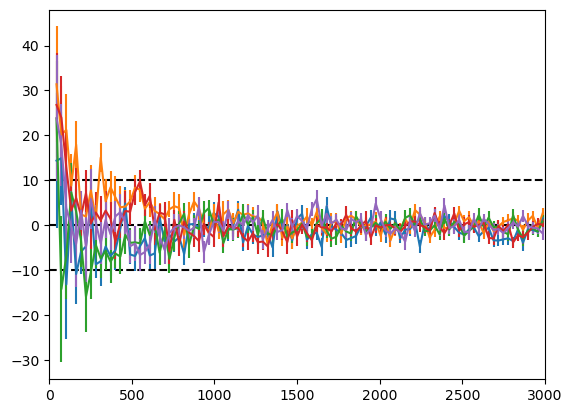

In [12]:
# Nchi 100
plt.plot([0,3000],[0,0], linestyle="--", color="k")
plt.plot([0,3000],[10,10], linestyle="--", color="k")
plt.plot([0,3000],[-10,-10], linestyle="--", color="k")


for iii in range(5):
    N_pix_pow = 10
    fields = Fields("g", N_pix_pow=N_pix_pow)
    omega_10_g = fields.get_omega_template(100, F_L_spline=F_L_spline_g, C_inv_spline=C_inv_spline_g, tracer_noise=True)
    ps_10_g, kBins, errs_10_g = fields.get_ps_binned(omega_10_g, nBins=100, kmin=30, kmax=3000)
    fiducial = (2 * np.pi) ** 2 *omega_spline_mine(kBins)/F_L_spline_g(kBins)
    plt.errorbar(kBins, (fiducial - ps_10_g)/fiducial * 100, errs_10_g/fiducial * 100, label="10")


# plt.ylim(-4,4)
plt.xlim(0,3000)
plt.show()

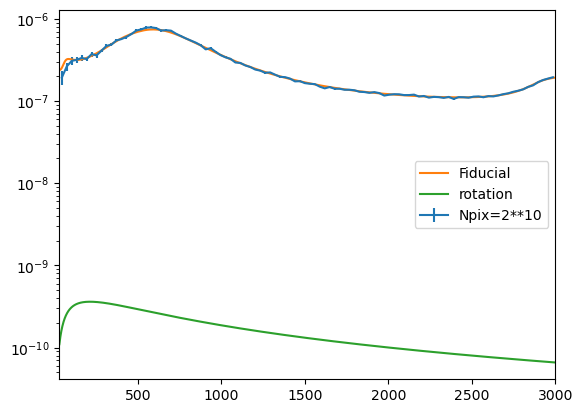

In [13]:
ps_10_g, kBins, errs_10_g = fields.get_ps_binned(omega_10_g, nBins=100, kmin=30, kmax=3000)

plt.errorbar(kBins, ps_10_g, errs_10_g, label=f"Npix=2**10")

Ls = np.arange(30, 3000)
plt.semilogy(Ls, (2 * np.pi) ** 2 * omega_spline_mine(Ls)/F_L_spline_g(Ls), label="Fiducial")
plt.semilogy(Ls, (2 * np.pi) ** 2 * omega_spline_mine(Ls), label="rotation")
plt.xlim(30,3000)
plt.legend()

In [16]:
Ls = np.load("_results/F_L_results/I/SO/gmv/TEB/30_3000/1_2000/Ls.npy")
F_L_spline_I = InterpolatedUnivariateSpline(Ls, np.load("_results/F_L_results/I/SO/gmv/TEB/30_3000/1_2000/F_L.npy"))
%time C_inv_spline_I = _C_inv_splines("I")

CPU times: user 304 ms, sys: 188 ms, total: 492 ms
Wall time: 133 ms


[0:00:32] 100%
[0:00:33] 100%
[0:00:33] 100%
[0:00:34] 100%
[0:00:32] 100%


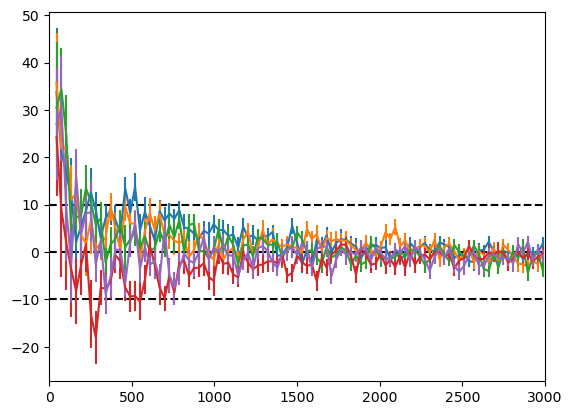

In [17]:
# Nchi 100
plt.plot([0,3000],[0,0], linestyle="--", color="k")
plt.plot([0,3000],[10,10], linestyle="--", color="k")
plt.plot([0,3000],[-10,-10], linestyle="--", color="k")

fiducial = (2 * np.pi) ** 2 *omega_spline_mine(kBins)/F_L_spline_I(kBins)

for iii in range(5):
    N_pix_pow = 10
    fields = Fields("I", N_pix_pow=N_pix_pow)
    omega_10_I = fields.get_omega_template(100, F_L_spline=F_L_spline_I, C_inv_spline=C_inv_spline_I, tracer_noise=True)
    Lmap_10_I = fields.kM
    ps_10_I, kBins, errs_10_I = fields.get_ps_binned(omega_10_I, nBins=100, kmin=30, kmax=3000, kM=Lmap_10_I)
    plt.errorbar(kBins, (fiducial - ps_10_I)/fiducial * 100, errs_10_I/fiducial * 100, label="10")


# plt.ylim(-4,4)
plt.xlim(0,3000)
plt.show()

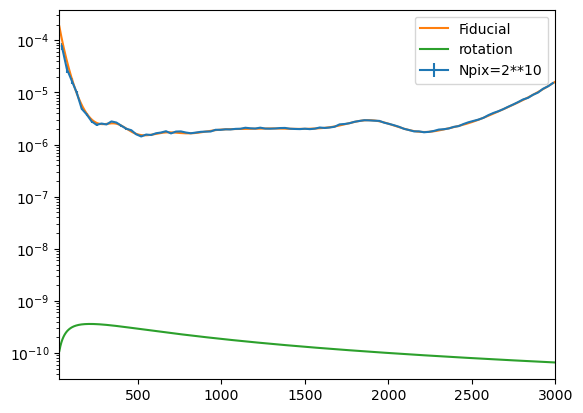

In [18]:
ps_10_I, kBins, errs_10_I = fields.get_ps_binned(omega_10_I, nBins=100, kmin=30, kmax=3000)

plt.errorbar(kBins, ps_10_I, errs_10_I, label=f"Npix=2**10")

Ls = np.arange(30, 3000)
plt.semilogy(Ls, (2 * np.pi) ** 2 * omega_spline_mine(Ls)/F_L_spline_I(Ls), label="Fiducial")
plt.semilogy(Ls, (2 * np.pi) ** 2 * omega_spline_mine(Ls), label="rotation")
plt.xlim(30,3000)
plt.legend()